In [130]:
import sys
import os
import numpy as np
import pandas as pd

sys.path.append('../')
from src_experiment import get_path_to_moon_experiment_storage
from geobin import EstimateQuantities1Run, AveragedEstimates

In [131]:
# Testing parameters
model_name = "medium_uniform"
dataset_name = "medium"
noise_level = 0.5
run_number = 1

In [132]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_training_history(model_name, dataset_name, noise_level, run_number):
    # Load run summary CSV
    summary_path = get_path_to_moon_experiment_storage(model_name, dataset_name, noise_level, run_number) / "run_summary.csv"
    df = pd.read_csv(summary_path)
    
    # Epochs
    epochs = range(len(df))
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # ---- Loss (left y-axis) ----
    ax.plot(epochs, df["train_loss"], color="blue", label="Train loss", lw=2)
    ax.plot(epochs, df["test_loss"], color="blue", ls="dashed", label="Test loss", lw=2)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss", color="blue")
    ax.tick_params(axis='y', labelcolor="blue")
    
    # ---- Accuracy (right y-axis) ----
    ax2 = ax.twinx()
    ax2.plot(epochs, df["train_accuracy"], color="red", label="Train accuracy", lw=2)
    ax2.plot(epochs, df["test_accuracy"], color="red", ls="dashed", label="Test accuracy", lw=2)
    ax2.set_ylabel("Accuracy", color="red")
    ax2.tick_params(axis='y', labelcolor="red")
    
    # ---- Legends ----
    # Combine legends from both axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc="best")
    
    ax.grid(True)
    plt.show()


In [193]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_multiple_runs_grid(model_name, dataset_name, noise_level, run_numbers=np.arange(1,26, dtype=np.int64), figsize=(20, 20)):
    """
    Plot multiple runs in a 5x5 grid. 
    Bottom row shows x-ticks, leftmost column shows primary y-ticks.
    Rightmost column shows secondary y-ticks.
    """
    n_rows, n_cols = 5, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)  # <-- remove sharex/sharey
    axes = axes.flatten()
    
    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]
        
        # Load run summary CSV
        summary_path = get_path_to_moon_experiment_storage(model_name, dataset_name, noise_level, int(run_number)) / "run_summary.csv"
        df = pd.read_csv(summary_path)
        epochs = range(len(df))
        
        # ---- Loss (left y-axis) ----
        ax.plot(epochs, df["train_loss"], color="blue", lw=1.5)
        ax.plot(epochs, df["test_loss"], color="blue", ls="dashed", lw=1.5)
        ax.set_ylabel("Loss", color="blue", fontsize=8)
        ax.tick_params(axis='y', labelcolor="blue", labelsize=8)
        
        # ---- Accuracy (right y-axis) ----
        ax2 = ax.twinx()
        ax2.plot(epochs, df["train_accuracy"], color="red", lw=1.5)
        ax2.plot(epochs, df["test_accuracy"], color="red", ls="dashed", lw=1.5)
        ax2.set_ylabel("Accuracy", color="red", fontsize=8)
        ax2.tick_params(axis='y', labelcolor="red", labelsize=8)
        
        # Title
        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)
        
        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols
        
        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
            ax2.set_xticklabels([])
        else:
            ax.set_xlabel("Epochs", fontsize=8)
        
        # Only first column keeps primary y-ticks
        if col != 0:
            ax.set_yticklabels([])
        
        # Only last column keeps secondary y-ticks
        if col != n_cols - 1:
            ax2.set_yticklabels([])
    
    fig.suptitle(f"Model: {model_name}, dataset: {dataset_name}, noise: {noise_level}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


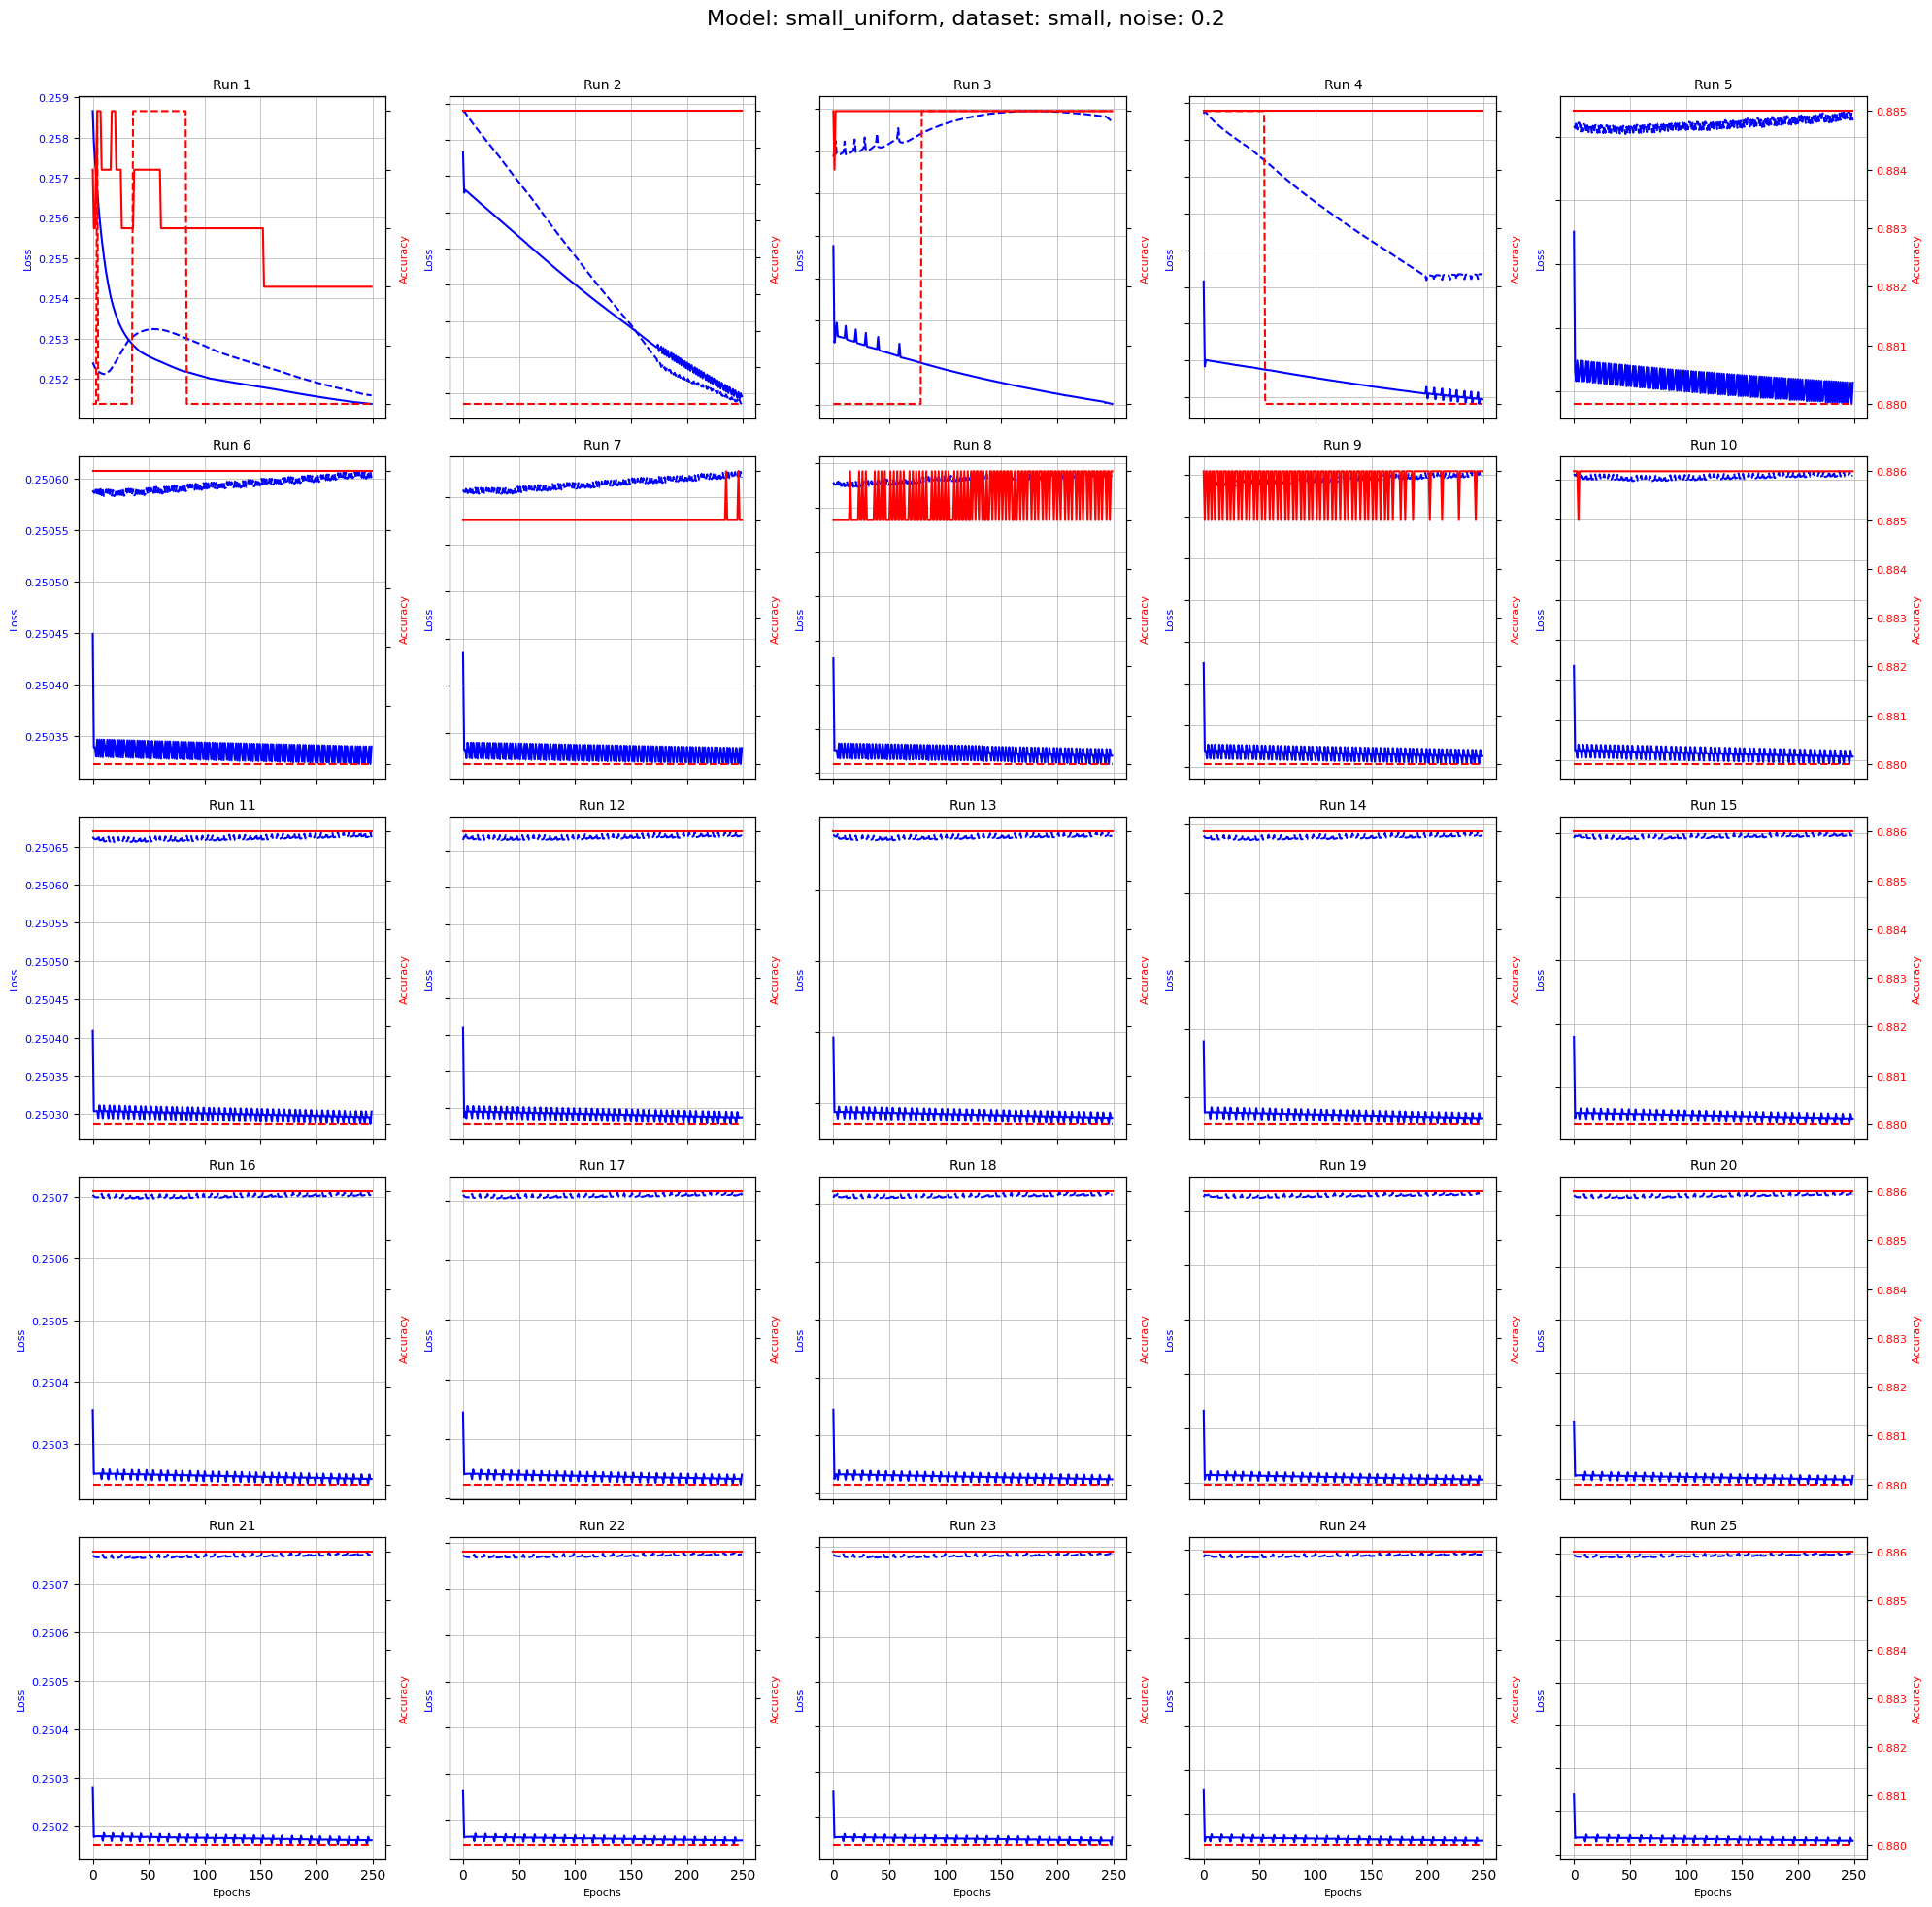

In [195]:
plot_multiple_runs_grid(model_name="small_uniform",
                        dataset_name="small",
                        noise_level=0.2)

In [155]:
np.arange(1,26, dtype=np.int64)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [134]:
first_run = EstimateQuantities1Run(model_name, dataset_name, noise_level, run_number)

In [135]:
MI = first_run.estimates["MI_KL"]
MI

[]

In [136]:
first_run.calculate_estimates()
MI = first_run.estimates["MI_KL"]
MI

,epoch,l1,l2,l3,l4
0,0,0.090574,0.115300,0.115402,0.232917
1,10,0.090401,0.102879,0.102879,0.223353
2,20,0.088046,0.102350,0.102350,0.226632
3,30,0.088143,0.102186,0.102186,0.226620
4,40,0.088058,0.102350,0.102350,0.226784
5,50,0.086908,0.101487,0.101487,0.226196
6,60,0.086650,0.101790,0.101790,0.225585
7,70,0.086216,0.102917,0.102917,0.224847
8,80,0.086177,0.104238,0.104238,0.224339
9,90,0.086139,0.104182,0.104182,0.224283


In [137]:
# Function to plot
np.arange(1,26)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [138]:
import matplotlib.pyplot as plt

def plot_layers_exclude_last(df, lw=2):
    """
    Plot all layers except the last one on the same figure as functions of epoch.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with columns 'epoch' and layers like 'l1', 'l2', ...
    lw : float
        Line width for the curves.
    """
    # All columns except 'epoch' and the last layer
    layers = df.columns[1:-1]  # skip first (epoch) and last
    
    plt.figure(figsize=(10, 6))
    
    for layer in layers:
        plt.plot(df["epoch"], df[layer], lw=lw, label=layer)
    
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title("Layer values as a function of epoch (excluding last layer)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


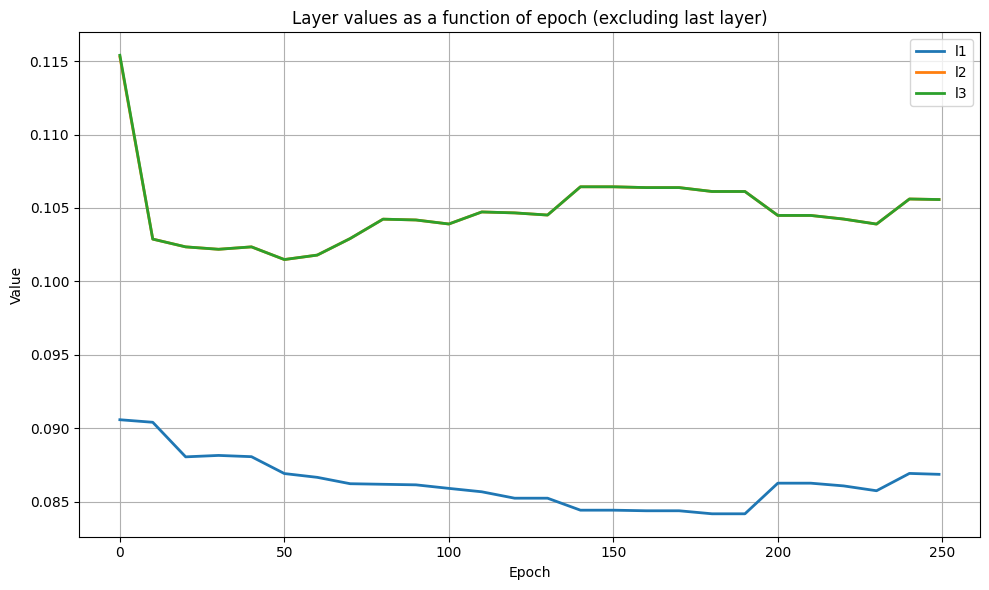

In [139]:
plot_layers_exclude_last(MI)

In [140]:
avg1 = AveragedEstimates()
avg1._find_from_all_runs()

In [141]:
dfs = avg1.individual_estimates["MI_KL"]

In [142]:
all_runs = (
    pd.concat(dfs, keys=range(1, 26), names=["run", "row"])
      .reset_index(level="run")
)


In [143]:
all_runs

,run,epoch,l1,l2,l3,l4
row,,,,,,
0,1,0,0.244655,0.283224,0.331239,0.331376
1,1,10,0.247073,0.313191,0.344907,0.344917
2,1,20,0.264956,0.341692,0.369938,0.369938
3,1,30,0.287975,0.367827,0.390335,0.390772
4,1,40,0.295778,0.370136,0.394253,0.394939
...,...,...,...,...,...,...
21,25,210,0.215762,0.215762,0.215762,0.378579
22,25,220,0.215762,0.215762,0.215762,0.378579
23,25,230,0.215762,0.215762,0.215762,0.378579


In [144]:
summary = (
    all_runs
    .groupby("epoch")[["l1", "l2", "l3", "l4"]]
    .agg(["mean", "std"])
)


In [145]:
summary

l1                  l2                  l3                  l4  \
           mean       std      mean       std      mean       std      mean   
epoch                                                                         
0      0.242668  0.059164  0.244563  0.060249  0.251490  0.069445  0.394260   
10     0.241052  0.053748  0.243993  0.056205  0.250482  0.065788  0.393372   
20     0.241710  0.053226  0.245255  0.057468  0.251010  0.065563  0.394147   
30     0.241624  0.050065  0.244906  0.055572  0.250645  0.064224  0.394442   
40     0.242053  0.051323  0.245499  0.057199  0.250779  0.064581  0.394698   
50     0.241299  0.049242  0.244666  0.056105  0.250025  0.064350  0.394693   
60     0.241400  0.048498  0.244534  0.055723  0.249877  0.064053  0.394753   
70     0.241125  0.048034  0.244030  0.055286  0.249523  0.063925  0.394795   
80     0.240561  0.047949  0.243023  0.054653  0.248265  0.063035  0.395368   
90     0.241485  0.049381  0.243584  0.055441  0.248654  0.063826  0.395639   
100    0.242092  0.051242  0.243938  0.056746  0.249325  0.065715  0.394726   
110    0.242810  0.055061  0.244400  0.059993  0.250027  0.068964  0.394593   
120    0.244405  0.058612  0.245737  0.062917  0.251214  0.072102  0.395549   
130    0.244261  0.061139  0.245386  0.064871  0.250932  0.074138  0.395482   
140    0.246538  0.068451  0.247398  0.071351  0.253160  0.080133  0.397540   
150    0.247446  0.073657  0.248161  0.076044  0.253927  0.084626  0.398466   
160    0.247672  0.075732  0.248248  0.077573  0.254167  0.086714  0.398843   
170    0.248322  0.080654  0.248778  0.081768  0.254694  0.090685  0.400013   
180    0.249763  0.088576  0.250033  0.088846  0.255957  0.097571  0.401820   
190    0.248196  0.081843  0.248546  0.082255  0.254081  0.090911  0.400206   
200    0.245770  0.073897  0.246342  0.074693  0.251990  0.083404  0.398459   
210    0.243926  0.067257  0.244279  0.067749  0.250175  0.076702  0.397281   
220    0.243204  0.064365  0.243555  0.064888  0.249208  0.073645  0.396690   
230    0.242396  0.061114  0.242778  0.061824  0.248412  0.070706  0.396314   
240    0.242245  0.061398  0.242809  0.062322  0.247904  0.069587  0.395933   
249    0.241886  0.059283  0.242239  0.059833  0.247119  0.067141  0.395699   

                 
            std  
epoch            
0      0.034395  
10     0.029760  
20     0.027487  
30     0.024793  
40     0.025782  
50     0.024154  
60     0.023022  
70     0.022781  
80     0.025150  
90     0.025012  
100    0.022749  
110    0.023946  
120    0.026448  
130    0.029202  
140    0.035188  
150    0.040101  
160    0.042461  
170    0.047782  
180    0.055903  
190    0.049916  
200    0.042779  
210    0.037488  
220    0.034954  
230    0.032912  
240    0.032952  
249    0.032238

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_runs_with_mean_std(dfs, layers=None, alpha_runs=0.2, lw_runs=0.8, lw_mean=2.5):
    """
    Plot all runs as thin lines and overlay mean ± std.

    Parameters
    ----------
    dfs : list[pd.DataFrame]
        One DataFrame per run, with columns ['epoch', 'l1', 'l2', ...]
    layers : list[str], optional
        Which layer columns to plot. Defaults to all except 'epoch'.
    alpha_runs : float
        Transparency of individual runs.
    lw_runs : float
        Line width of individual runs.
    lw_mean : float
        Line width of mean curve.
    """

    if layers is None:
        layers = [c for c in dfs[0].columns if c != "epoch"]

    # Stack runs
    all_runs = pd.concat(dfs, keys=range(len(dfs)), names=["run"])
    all_runs = all_runs.reset_index(level="run")

    for layer in layers:
        fig, ax = plt.subplots()

        # Plot individual runs
        for _, df in all_runs.groupby("run"):
            ax.plot(df["epoch"], df[layer], alpha=alpha_runs, lw=lw_runs)

        # Mean and std across runs
        stats = (
            all_runs
            .groupby("epoch")[layer]
            .agg(["mean", "std"])
            .reset_index()
        )

        ax.plot(stats["epoch"], stats["mean"], lw=lw_mean, label="mean")
        ax.fill_between(
            stats["epoch"],
            stats["mean"] - stats["std"],
            stats["mean"] + stats["std"],
            alpha=0.3,
            label="±1 std"
        )

        ax.set_xlabel("Epoch")
        ax.set_ylabel(layer)
        ax.set_title(f"{layer}: runs, mean ± std")
        ax.legend()
        ax.grid(True)

        plt.show()


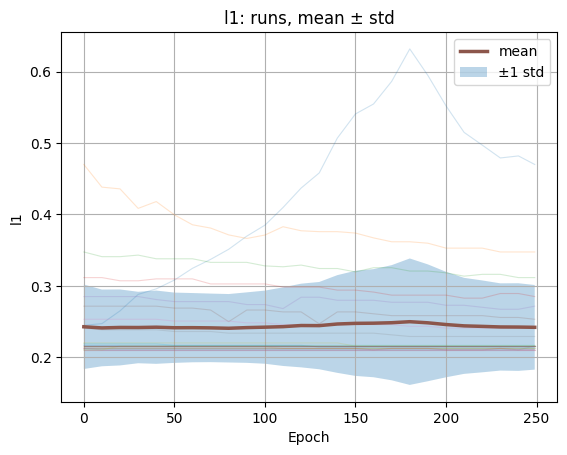

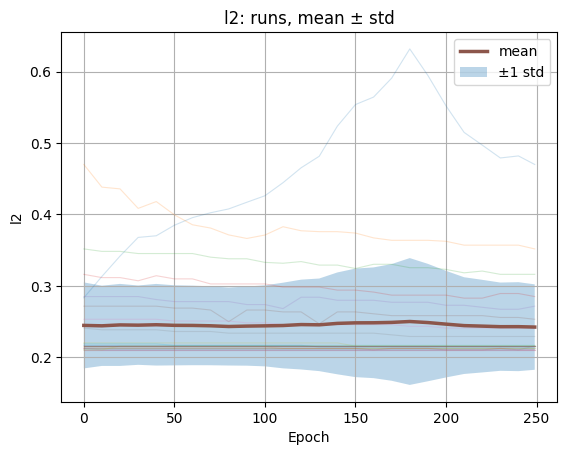

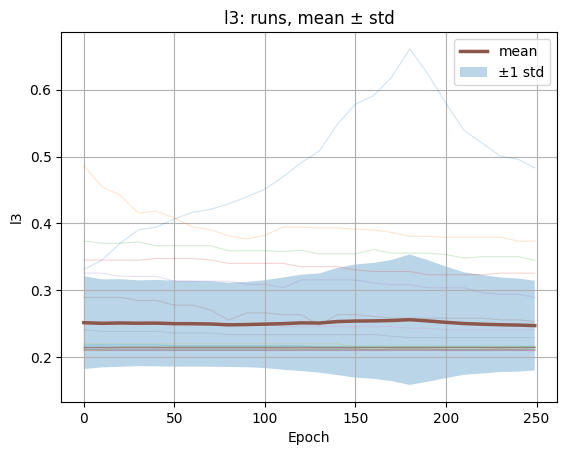

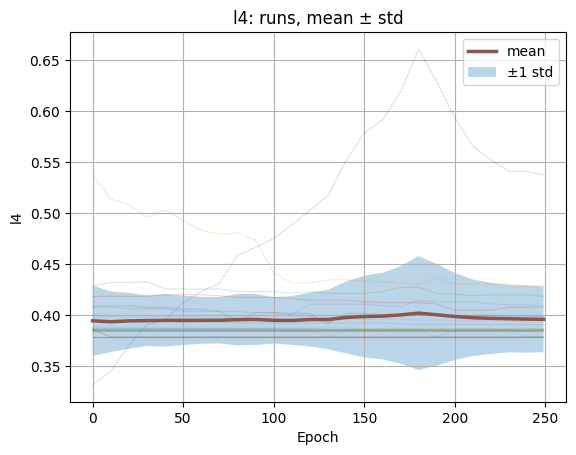

In [147]:
plot_runs_with_mean_std(dfs)